# Correlation and Covariance

__Purpose:__ The purpose of this lecture is to understand correlation and covariance.

__At the end of this lecture you will be able to:__
> 1. Understand some summary statistics such as Correlation and Covariance

### 1.1.1 Correlation and Covariance:

__Overview:__ 
- We can use a series of statistics to evaluate the relationship between the two variables:
> 1. __[Covariance](https://en.wikipedia.org/wiki/Covariance):__ Covariance measures how the two variables vary with each other. Covariance investigates if the two variables tend to increase and decrease together or if one variable increases when the other decreases or vice versa or if the variables do not vary at all with each other (covariance of 0)
>> - The formula for Covariance can be represented in terms of Expected Value and Variance: 
<center> $Cov(X, Y) = \sigma_{XY} = E[XY] - E[X][Y] = E[(X - \mu_{X})(Y - \mu_{Y})]$ </center> 

>> - The formula for Covariance can also be represented in the following way:
<center> $Cov(X, Y) = \sigma_{XY} = \frac{\sum_{i=1}^{n} (x_{i} - \mu_{x})(y_{i} - \mu_{y})}{n}$ </center>

>> - If two variables $X$ and $Y$ are independent, then $Cov(X,Y) = 0$, but the opposite is not always true 
>> - The problem with Covariance is that it is not normalized and therefore difficult to determine if the magnitude of Covariance is considered strong or weak. This warrants a normalized measure of variable association of which we define Correlation below 
> 2. __[Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence):__ Correlation is very similar to Covariance but is scaled by the Standard Deviations of the two variables such that Correlation can only range between -1 and +1. 
>> - The formula for Correlation can be represented in the following way:
<center> $Cor(X, Y) = r_{XY} = \frac{\frac{\sum_{i=1}^{n} (x_{i} - \mu_{x})(y_{i} - \mu_{y})}{n}}{\sigma_x \sigma_y}$ </center> 

>> - We can now interpret the mangitude of the Correlation and conclude that if the Correlation is positive, the variables move in the same direction, if the Correlation is negative is negative, the two variables move in opposite direction, and if the Correlation is 0, the variables do move together in either direction 

__Helpful Points:__
1. It is possible to create Covariance and Correlation Matrices which calculates the Covariance and Correlation, respectively, of a series of variables and summarizes this information into a symmetric matrix
2. Typically, we calculate the Covariance and Correlation Matrices of a data set to observe all the paired covariance and correlation values for every pair of variables 

__Practice:__ Examples of Correlation and Covariance in Python 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in data to analyze 
nba_df = pd.read_csv("C:/Users\youss\Google Drive/Data science training course/Matrial/BPM_Prework-main/lessons/26_correlation_covariance_anscombes/NBA_GameLog_2010_2017.csv")

### Example 1 (Covariance):

In [3]:
# subset of nba data for cov and cor calculations 
nba_df_subset = nba_df.loc[:, ['Tm.Pts', 'Tm.FG_Perc', 'Tm.3P_Perc', 'Tm.FT_Perc', 
                               'Tm.TRB','Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF']]

In [4]:
nba_df_subset_cov = pd.DataFrame(np.cov(nba_df_subset.T)) # "return data frame as covariance matrix"
nba_df_subset_cov.columns = ['Tm.Pts', 'Tm.FG_Perc', 'Tm.3P_Perc', 'Tm.FT_Perc', 
                               'Tm.TRB','Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF'] # "column subset on co;umn names"
nba_df_subset_cov.index = ['Tm.Pts', 'Tm.FG_Perc', 'Tm.3P_Perc', 'Tm.FT_Perc', 
                               'Tm.TRB','Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF'] # "rows subset on row names"
nba_df_subset_cov

,Tm.Pts,Tm.FG_Perc,Tm.3P_Perc,Tm.FT_Perc,Tm.TRB,Tm.AST,Tm.STL,Tm.BLK,Tm.TOV,Tm.PF
Tm.Pts,147.523854,0.468805,0.593105,0.216965,10.056589,34.856841,4.510063,1.680997,-4.704925,7.426513
Tm.FG_Perc,0.468805,0.003133,0.002757,0.000073,-0.072631,0.153645,0.004388,0.005725,0.007339,-0.000621
Tm.3P_Perc,0.593105,0.002757,0.012074,0.000221,-0.072651,0.198534,-0.003194,0.003556,0.005498,0.002567
Tm.FT_Perc,0.216965,0.000073,0.000221,0.010602,-0.037013,-0.001035,-0.003037,-0.000288,-0.009051,0.003774
Tm.TRB,10.056589,-0.072631,-0.072651,-0.037013,42.333663,1.098065,-1.750161,2.815002,3.186443,-0.327592
Tm.AST,34.856841,0.153645,0.198534,-0.001035,1.098065,25.413989,1.687982,0.881108,-0.886902,-0.567222
Tm.STL,4.510063,0.004388,-0.003194,-0.003037,-1.750161,1.687982,8.386989,0.032831,1.308719,0.273774
Tm.BLK,1.680997,0.005725,0.003556,-0.000288,2.815002,0.881108,0.032831,6.647865,0.451256,0.036096
Tm.TOV,-4.704925,0.007339,0.005498,-0.009051,3.186443,-0.886902,1.308719,0.451256,14.616469,2.450163
Tm.PF,7.426513,-0.000621,0.002567,0.003774,-0.327592,-0.567222,0.273774,0.036096,2.450163,18.883561


We can now evaluate the covariance between every pair of variables in the subsetted data set. For example:
- The covariance between Team Points and Team Total Rebounds is 10.05
- The covariance between Team 3 Point Shot Percentage and Team Steal sis -0.003

Note:
1. The matrix is symmetric so you only need to consider either the upper right triangle or the lower left triangle 
2. The diagonal elements represent the covariance of the variable onto itself which is just the variance of that variable (see below)

In [5]:
# variance of each column which is the diagonal elements of the covariance matrix 
nba_df_subset.var(axis = 0) # "axis=0 means compute for each column"

Tm.Pts        147.523854
Tm.FG_Perc      0.003133
Tm.3P_Perc      0.012074
Tm.FT_Perc      0.010602
Tm.TRB         42.333663
Tm.AST         25.413989
Tm.STL          8.386989
Tm.BLK          6.647865
Tm.TOV         14.616469
Tm.PF          18.883561
dtype: float64

### Example 2 (Correlation):

In [6]:
nba_df_subset_corr = pd.DataFrame(np.corrcoef(nba_df_subset.T)) # "corrcoef is similiar function to above but this function calculates row based correlations by default, but we want column correlations, hence w use transpose"
nba_df_subset_corr.columns = ['Tm.Pts', 'Tm.FG_Perc', 'Tm.3P_Perc', 'Tm.FT_Perc', 
                               'Tm.TRB','Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF']
nba_df_subset_corr.index = ['Tm.Pts', 'Tm.FG_Perc', 'Tm.3P_Perc', 'Tm.FT_Perc', 
                               'Tm.TRB','Tm.AST', 'Tm.STL', 'Tm.BLK', 'Tm.TOV', 'Tm.PF']
nba_df_subset_corr

,Tm.Pts,Tm.FG_Perc,Tm.3P_Perc,Tm.FT_Perc,Tm.TRB,Tm.AST,Tm.STL,Tm.BLK,Tm.TOV,Tm.PF
Tm.Pts,1.000000,0.689606,0.444399,0.173486,0.127256,0.569273,0.128218,0.053678,-0.101321,0.140706
Tm.FG_Perc,0.689606,1.000000,0.448318,0.012583,-0.199442,0.544528,0.027072,0.039672,0.034299,-0.002553
Tm.3P_Perc,0.444399,0.448318,1.000000,0.019494,-0.101618,0.358403,-0.010038,0.012550,0.013088,0.005375
Tm.FT_Perc,0.173486,0.012583,0.019494,1.000000,-0.055248,-0.001993,-0.010185,-0.001085,-0.022991,0.008434
Tm.TRB,0.127256,-0.199442,-0.101618,-0.055248,1.000000,0.033477,-0.092882,0.167801,0.128098,-0.011586
Tm.AST,0.569273,0.544528,0.358403,-0.001993,0.033477,1.000000,0.115619,0.067788,-0.046017,-0.025893
Tm.STL,0.128218,0.027072,-0.010038,-0.010185,-0.092882,0.115619,1.000000,0.004397,0.118201,0.021754
Tm.BLK,0.053678,0.039672,0.012550,-0.001085,0.167801,0.067788,0.004397,1.000000,0.045778,0.003222
Tm.TOV,-0.101321,0.034299,0.013088,-0.022991,0.128098,-0.046017,0.118201,0.045778,1.000000,0.147480
Tm.PF,0.140706,-0.002553,0.005375,0.008434,-0.011586,-0.025893,0.021754,0.003222,0.147480,1.000000


We can now evaluate the correlation between every pair of variables in the subsetted data set. For example:
- The correlation between Team Points and Team Total Rebounds is 0.127
- The correlation between Team 3 Point Shot Percentage and Team Steal is -0.01

Note:
1. The matrix is symmetric so you only need to consider either the upper right triangle or the lower left triangle 
2. The diagonal elements represent the correlation of the variable onto itself which is perfect correlation (1)

Below we are going to analyze graphically the relationship between __Tm.Pts__ and __Tm.FG_Perc__ which are highly correlated, as well as __Tm.3P_Perc__ and __Tm.TOV__ which have a low correlation,

First we will normalize the features (calculate their z-score) by subtracting their mean and dividing by their standard deviation.

In [8]:
# "standardizing some variables"
Pts_Norm = (nba_df_subset['Tm.Pts']-np.mean(nba_df_subset['Tm.Pts']))/np.std(nba_df_subset['Tm.Pts'])
FG_Perc_Norm = (nba_df_subset['Tm.FG_Perc']-np.mean(nba_df_subset['Tm.FG_Perc']))/np.std(nba_df_subset['Tm.FG_Perc'])

ThreeP_Perc_Norm = (nba_df_subset['Tm.3P_Perc']-np.mean(nba_df_subset['Tm.3P_Perc']))/np.std(nba_df_subset['Tm.3P_Perc'])
TOV_Norm = (nba_df_subset['Tm.TOV']-np.mean(nba_df_subset['Tm.TOV']))/np.std(nba_df_subset['Tm.TOV'])

Text(0, 0.5, 'Normalized FG_Perc')

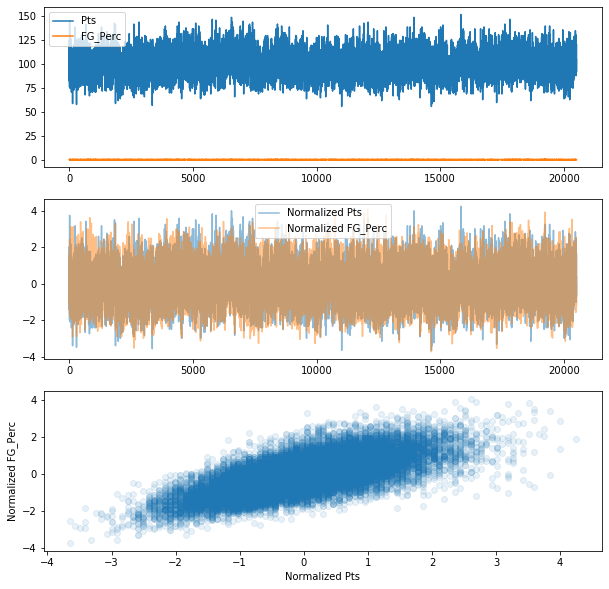

In [9]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.plot(nba_df_subset['Tm.Pts'])
plt.plot(nba_df_subset['Tm.FG_Perc'])
plt.legend(['Pts','FG_Perc'])
plt.subplot(3,1,2)
plt.plot(Pts_Norm,alpha = 0.5)
plt.plot(FG_Perc_Norm,alpha = 0.5)
plt.legend(['Normalized Pts','Normalized FG_Perc'])
plt.subplot(3,1,3)
plt.scatter(Pts_Norm,FG_Perc_Norm,alpha = 0.1)
plt.xlabel('Normalized Pts')
plt.ylabel('Normalized FG_Perc')

As we can see, there is a relationship between 'Pts' and 'FG_Perc'.

Text(0, 0.5, 'Normalized TOV')

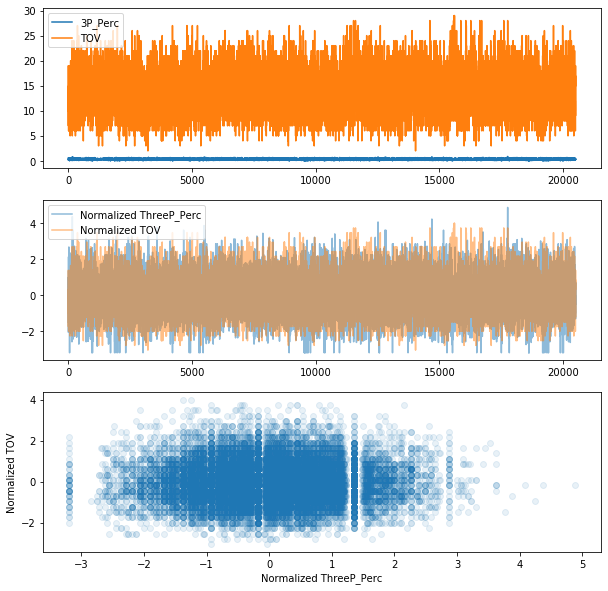

In [10]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.plot(nba_df_subset['Tm.3P_Perc'])
plt.plot(nba_df_subset['Tm.TOV'])
plt.legend(['3P_Perc','TOV'])
plt.subplot(3,1,2)
plt.plot(ThreeP_Perc_Norm,alpha = 0.5)
plt.plot(TOV_Norm,alpha = 0.5)
plt.legend(['Normalized ThreeP_Perc','Normalized TOV'])
plt.subplot(3,1,3)
plt.scatter(ThreeP_Perc_Norm,TOV_Norm,alpha = 0.1)
plt.xlabel('Normalized ThreeP_Perc')
plt.ylabel('Normalized TOV')

In this case, there is a relationship between '3P_Perc' and 'TOV'.

### Problem 1

Select the quantitative variables from the Seattle Home Price data and develop both a Covariance and Correlation Matrix as shown above. 

In [11]:
home_df = pd.read_csv("C:/Users/youss/Google Drive/Data science training course/Matrial/BPM_Prework-main/lessons/26_correlation_covariance_anscombes/SeattleHomePrices.csv")
# Write your code here 




### Example 3 (Correlation Heat Map):

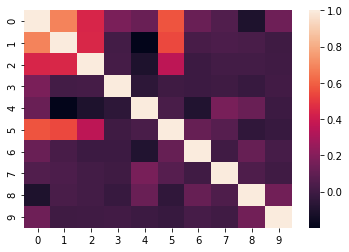

In [12]:
sns.heatmap(np.corrcoef(nba_df_subset.T)) # "heat map for correlation matrix"

### SOLUTIONS

### Problem 1

Select the quantitative variables from the Seattle Home Price data and develop both a Covariance and Correlation Matrix as shown above. 

In [13]:
home_df_subset = home_df.loc[:, ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
                               'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']]

In [14]:
home_df_subset = home_df_subset.dropna()

### Part 1 - Covariance Matrix

In [15]:
home_df_subset_cov = pd.DataFrame(np.cov(home_df_subset.T))
home_df_subset_cov.columns = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
                               'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']
home_df_subset_cov.index = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
                               'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']
home_df_subset_cov

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
PRICE,1.913292e+11,270421.518353,198872.656746,2.237646e+08,-4.985389e+09,2.036624e+06,3.967113e+06,3.738951e+07,6.891800e+07
BEDS,2.704215e+05,1.729911,0.866071,6.754015e+02,-8.149047e+03,1.161731e+01,5.801587e+00,-8.278894e+01,-8.393750e+01
BATHS,1.988727e+05,0.866071,0.755952,5.118026e+02,-4.489900e+03,8.233135e+00,4.531746e+00,-6.068948e+01,-1.614683e+01
SQUARE FEET,2.237646e+08,675.401538,511.802579,4.647828e+05,-3.608697e+06,3.888668e+03,5.479484e+03,-3.350945e+04,2.647457e+04
LOT SIZE,-4.985389e+09,-8149.046875,-4489.899802,-3.608697e+06,4.063261e+09,-1.030286e+05,4.884702e+04,-3.355914e+06,1.187314e+06
YEAR BUILT,2.036624e+06,11.617312,8.233135,3.888668e+03,-1.030286e+05,8.813053e+02,-1.753254e+02,-2.373956e+02,-3.716895e+02
DAYS ON MARKET,3.967113e+06,5.801587,4.531746,5.479484e+03,4.884702e+04,-1.753254e+02,7.135556e+02,5.570714e+02,1.863127e+03
$/SQUARE FEET,3.738951e+07,-82.788938,-60.689484,-3.350945e+04,-3.355914e+06,-2.373956e+02,5.570714e+02,4.500485e+04,2.680911e+04
HOA/MONTH,6.891800e+07,-83.937500,-16.146825,2.647457e+04,1.187314e+06,-3.716895e+02,1.863127e+03,2.680911e+04,1.096255e+05


### Part 2 - Correlation Matrix

In [16]:
home_df_subset_corr = pd.DataFrame(np.corrcoef(home_df_subset.T))
home_df_subset_corr.columns = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
                               'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']
home_df_subset_corr.index = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
                               'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']
home_df_subset_corr

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
PRICE,1.000000,0.470044,0.522922,0.750371,-0.178801,0.156840,0.339524,0.402930,0.475868
BEDS,0.470044,1.000000,0.757347,0.753226,-0.097198,0.297530,0.165128,-0.296709,-0.192747
BATHS,0.522922,0.757347,1.000000,0.863436,-0.081013,0.318974,0.195121,-0.329031,-0.056090
SQUARE FEET,0.750371,0.753226,0.863436,1.000000,-0.083040,0.192138,0.300885,-0.231693,0.117287
LOT SIZE,-0.178801,-0.097198,-0.081013,-0.083040,1.000000,-0.054445,0.028687,-0.248167,0.056256
YEAR BUILT,0.156840,0.297530,0.318974,0.192138,-0.054445,1.000000,-0.221089,-0.037695,-0.037815
DAYS ON MARKET,0.339524,0.165128,0.195121,0.300885,0.028687,-0.221089,1.000000,0.098303,0.210655
$/SQUARE FEET,0.402930,-0.296709,-0.329031,-0.231693,-0.248167,-0.037695,0.098303,1.000000,0.381678
HOA/MONTH,0.475868,-0.192747,-0.056090,0.117287,0.056256,-0.037815,0.210655,0.381678,1.000000
